# Moments, Sorting, Approximating and Matching Contours

In [ ]:
# imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

def imshow(title = "", image = None, size = 10):
  h,w = image.shape[0], image.shape[1]
  aspect_ratio = w/h
  plt.figure(figsize=(aspect_ratio * size, size))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.show()

# download & unzip images
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

### Find contours

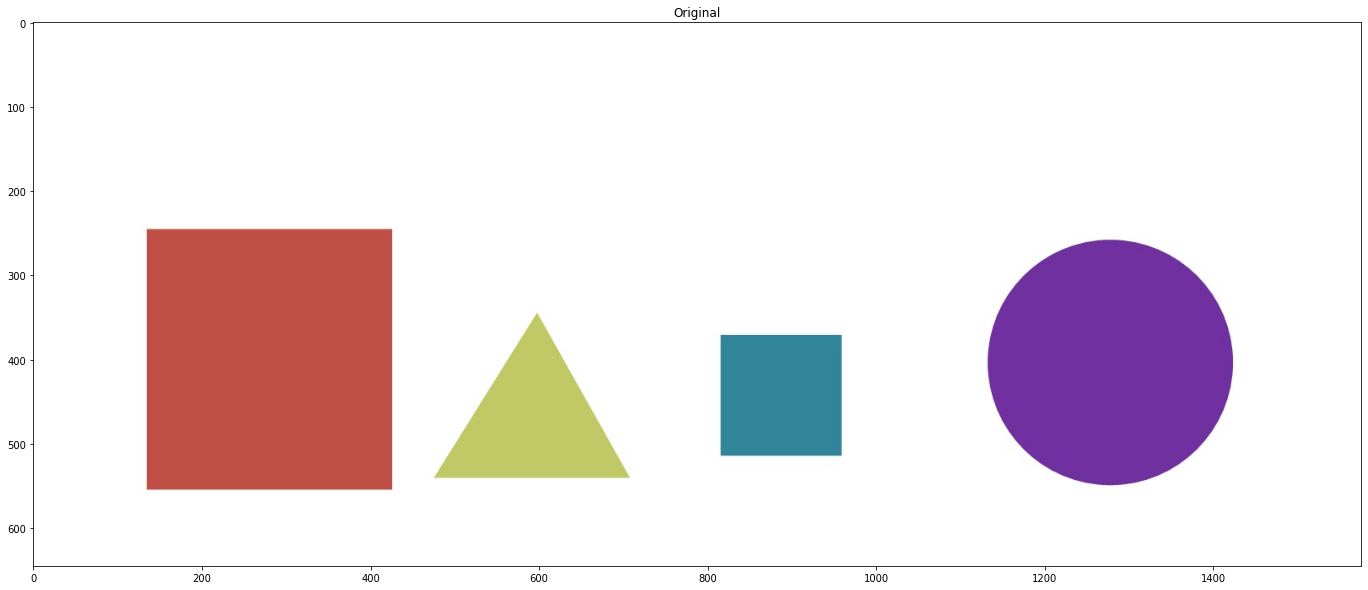

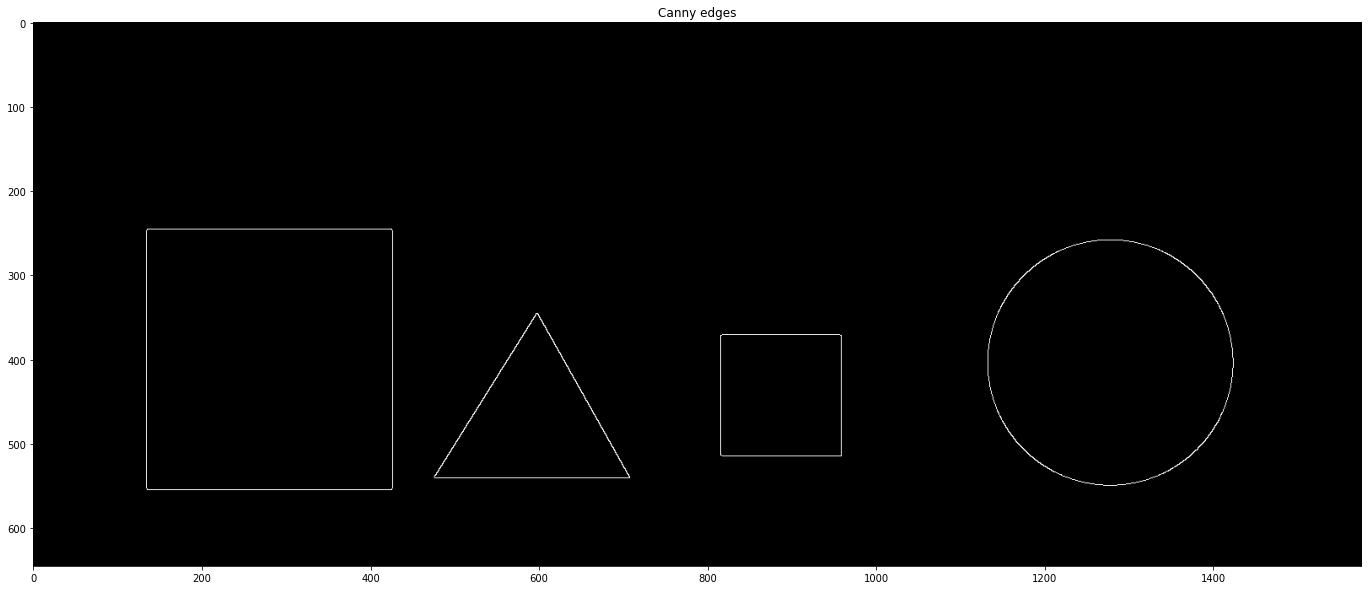

Number of contours found = 4


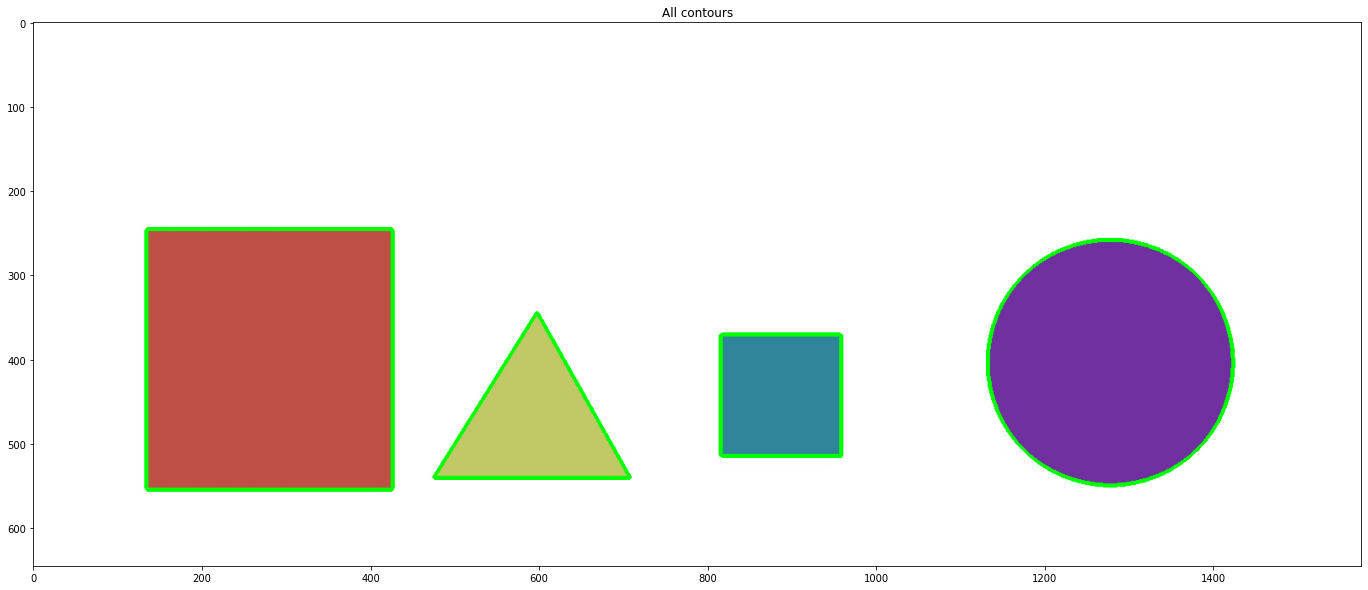

In [2]:
image = cv2.imread("/content/images/bunchofshapes.jpg")
imshow("Original", image)
# convert to grayscal
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# find canny edges
edges = cv2.Canny(gray, 50, 200)
imshow("Canny edges", edges)

# find contours
contours, heirarchy = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print("Number of contours found = "+str(len(contours)))

# draw contours
cv2.drawContours(image, contours, -1, (0,255,0), 3)
imshow("All contours", image)

### Sorting by area using cv2.ContourArea and cv2.Moments

Area of contours before sorting[20587.5, 22901.5, 66579.5, 90222.0]
Area of contours after sorting[90222.0, 66579.5, 22901.5, 20587.5]


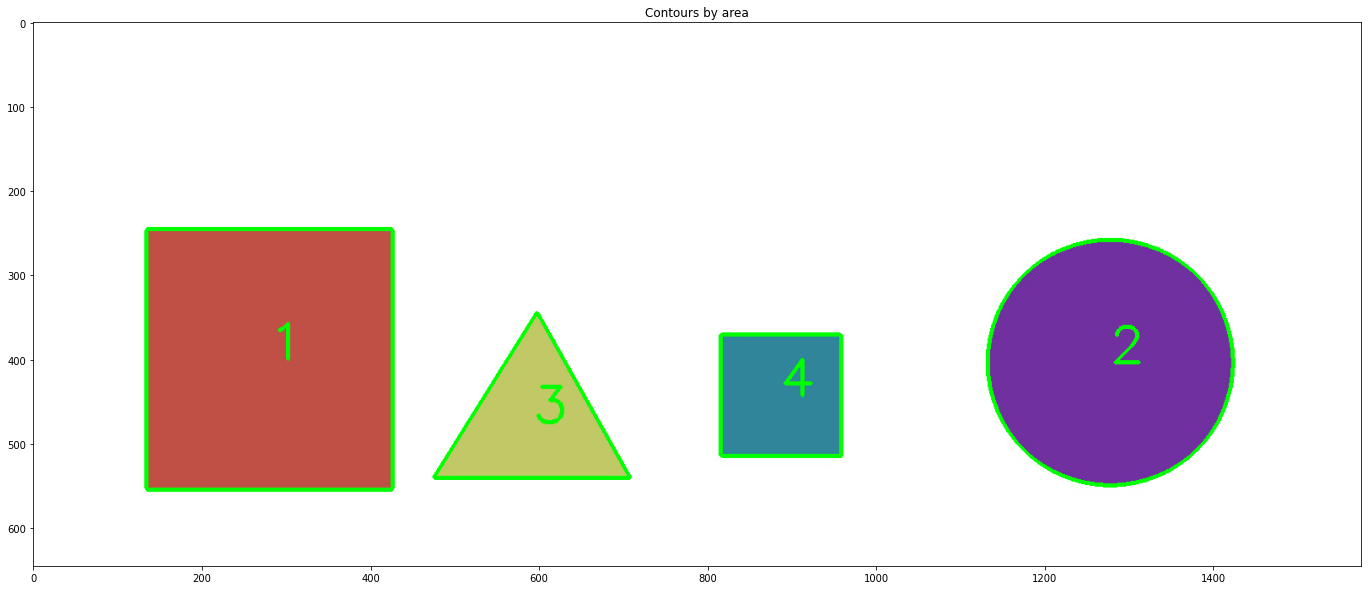

In [3]:
# function to get contour areas
def get_contour_areas(contours:list):
  """ Returns the areas of all contours as list"""
  areas = []
  for contour in contours:
    area = cv2.contourArea(contour)
    areas.append(area)
  return areas


# load image
image = cv2.imread("/content/images/bunchofshapes.jpg")

# print areas of contours before sorting
print("Area of contours before sorting"+str(get_contour_areas(contours)))

# sort contours large to small by area
sorted_contours = sorted(contours, key=cv2.contourArea, reverse = True)
# print areas of contours before sorting
print("Area of contours after sorting"+str(get_contour_areas(sorted_contours)))

# iterate over contours and draw one at a time
for (i, c) in enumerate(sorted_contours):
  M = cv2.moments(c)
  cx = int(M['m10'] / M['m00'])
  cy = int(M['m01'] / M['m00'])

  cv2.putText(image, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
  cv2.drawContours(image, [c], -1, (0,255,0), 3)

imshow("Contours by area", image)

### useful methods

In [4]:
def x_cord_contour(contours):
  """ Return the x coordinate for the contour centroid"""
  if cv2.contourArea(contours) > 10:
    M = cv2.moments(contours)
    return int(M['m10'] / M['m00'])
  else:
    pass

def label_contour_center(image, c):
  """ Places a red circle on the centers of contours"""
  M = cv2.moments(c)
  cx = int(M['m10'] / M['m00'])
  cy = int(M['m01'] / M['m00'])

  # Draw the circle
  cv2.circle(image, (cx, cy), 10, (0,0, 255), -1)
  return image

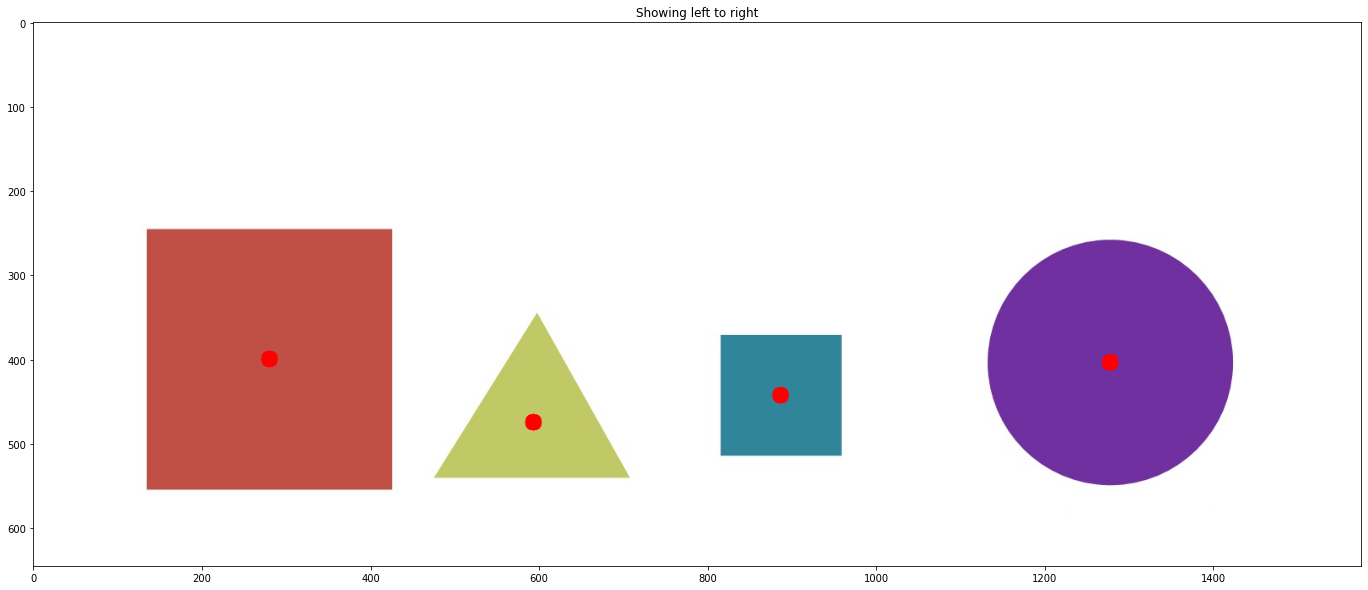

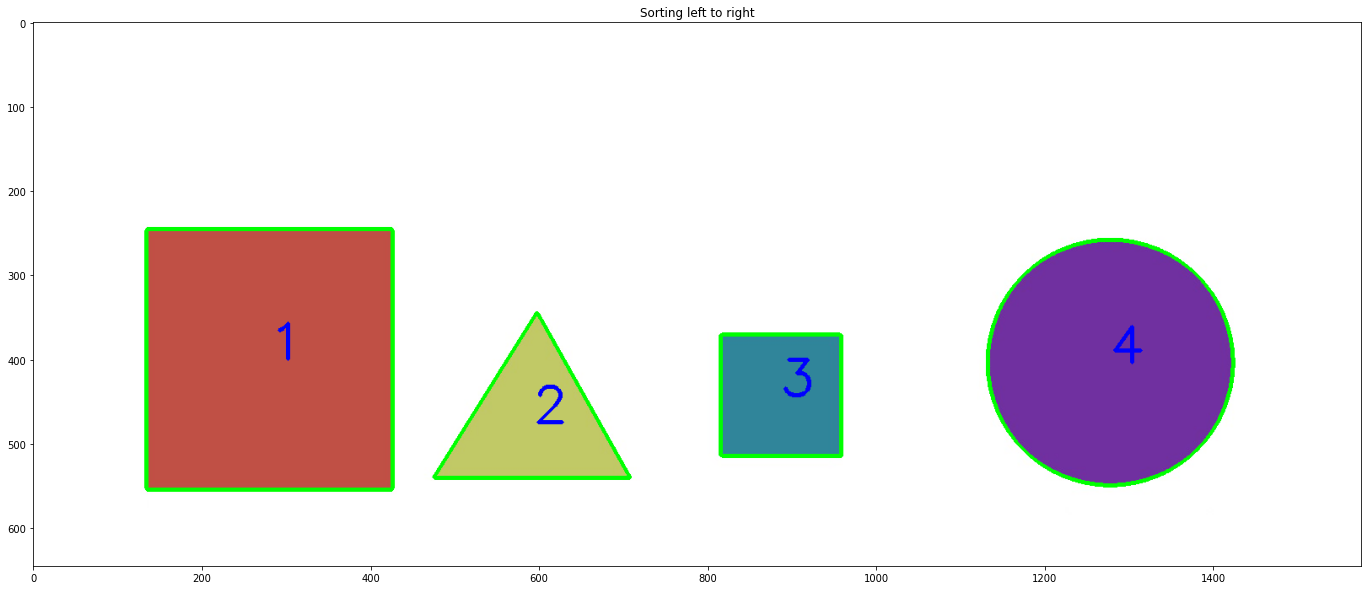

In [9]:
image = cv2.imread("/content/images/bunchofshapes.jpg")
original_image = image.copy()

# Calculate centroids and draw them on image
for(i, c) in enumerate(contours):
  orig = label_contour_center(image, c)

imshow("Showing left to right", image)

# Sort by left to right using x_cord_contour method
contours_left_to_right = sorted(contours, key=x_cord_contour, reverse=False)

# iterate over contours and draw one at a time
for (i, c) in enumerate(contours_left_to_right):
  cv2.drawContours(original_image, [c], -1, (0,255,0), 3)
  M = cv2.moments(c)
  cx = int(M['m10'] / M['m00'])
  cy = int(M['m01'] / M['m00'])

  cv2.putText(original_image, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 3)
  (x, y, w, h) = cv2.boundingRect(c)

imshow("Sorting left to right", original_image)

### Approximating contours using ApproxPolyDp


```
cv2.approxPolyDp(contour, approximation accuracy, closed)
```




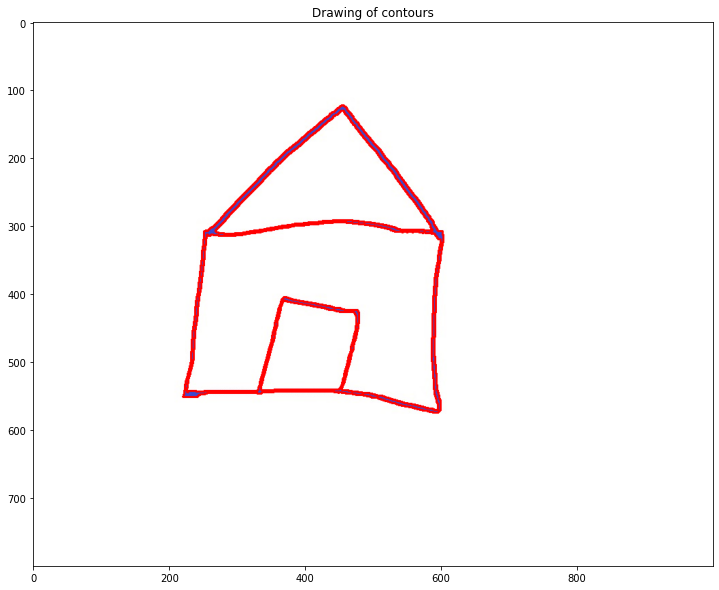

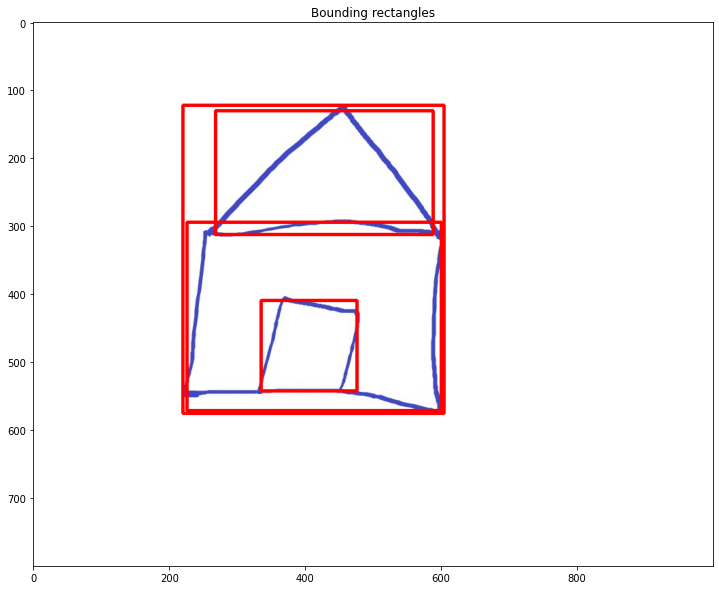

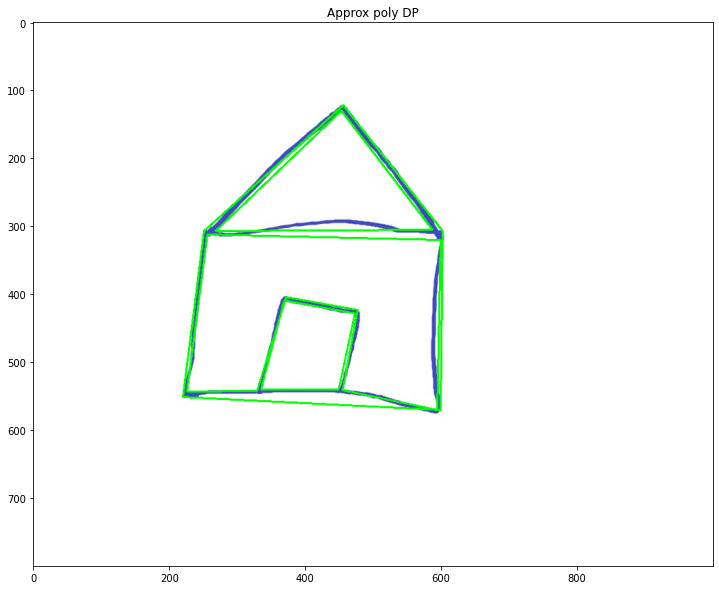

In [11]:
image = cv2.imread("/content/images/house.jpg")
original_image = image.copy()

# grayscale and binarize
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# find contours
contours, heirarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
copy = image.copy()

# iterate through each contour
for(i, c) in enumerate(contours):
  x,y,w,h = cv2.boundingRect(c)
  cv2.rectangle(original_image, (x,y), (x+w, y+h), (0,0,255),3)
  cv2.drawContours(image, [c], 0, (0,0,255), 2)

imshow("Drawing of contours", image)
imshow("Bounding rectangles", original_image)

# iterate through each contour and compute approx contour
for c in contours:
  # calculate accuracy as the percent of contour perimeter
  accuracy = 0.03 * cv2.arcLength(c, True)
  approx = cv2.approxPolyDP(c, accuracy, True)
  cv2.drawContours(copy, [approx], 0, (0,255,0), 2)

imshow("Approx poly DP", copy)

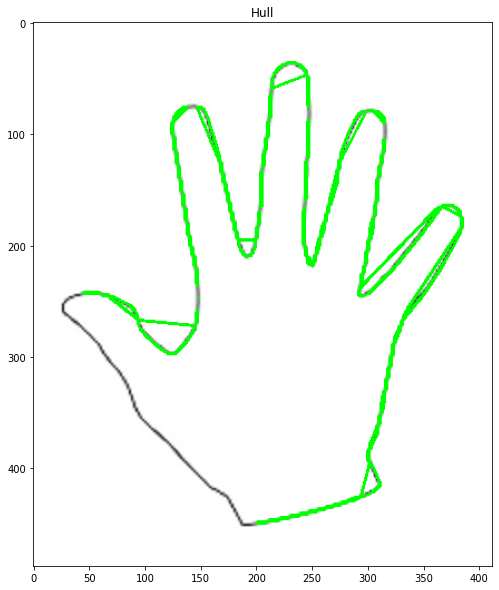

In [14]:
image = cv2.imread("/content/images/hand.jpg")
original_image = image.copy()

# grayscale and binarize
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# find contours
contours, heirarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# sort contour by area and then remove the largest frame contour
n = len(contours) - 1
contours = sorted(contours, key=cv2.contourArea, reverse=False)[:n]

# iterate through each contour and compute approx contour
for c in contours:
  # convex hull
  hull = cv2.convexHull(c)
  cv2.drawContours(image, [hull], 0, (0,255,0), 2)

imshow("Hull", image)

### Matching contours


```
cv2.matchShapes(contour template, contour, method, method parameter)
```
**Output**: match value (lower value means close match)

* **Contour template**: Reference contour we are trying to find in the image.
* **Contour**: The individual contour we are checking against.
* **method**: Type of contour matching (1,2,3)
* **method parameter**: Not fully utilized so leave as 0.0



0.13081816783853514
0.15902005339788694
0.14987915682525596
0.07094034474475601


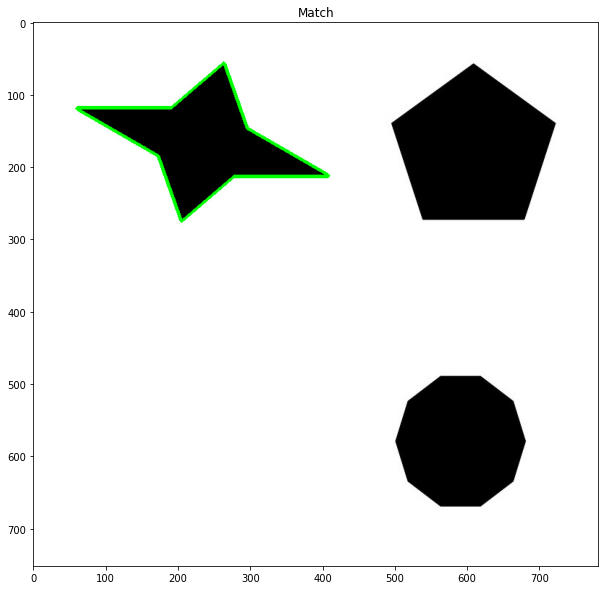

In [17]:
template = cv2.imread("/content/images/4star.jpg",0)

target = cv2.imread("/content/images/shapestomatch.jpg")
target_gray = cv2.cvtColor(target, cv2.COLOR_BGR2GRAY)

# Threshold both images
ret, thresh1 = cv2.threshold(template, 127, 255, 0)
ret, thresh2 = cv2.threshold(target_gray, 127, 255, 0)

# find contours in template
contours, heirarchy = cv2.findContours(thresh1, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

# We need to sort the contours by area so that we can remove the largest contour which is image outline
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)
# extract second largest contour which will be template contour
template_contour = sorted_contours[1]

# Extract contours from target image
contours, heirarchy = cv2.findContours(thresh2, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

closest_contour = []

for c in contours:
  # iterate through each contour in target image and use cv2.matchShapes to compare the shapes
  match = cv2.matchShapes(template_contour, c, 3, 0.0)
  print(match)
  if match < 0.15:
    closest_contour = c    

cv2.drawContours(target, [closest_contour], -1, (0,255,0), 3)
imshow("Match", target)